In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Importing data

In [2]:
# import csv
df = pd.read_csv('data.csv')
df.head()

row.names  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  \
0          1  160    12.00  5.73      23.11  Present     49    25.30    97.20   
1          2  144     0.01  4.41      28.61   Absent     55    28.87     2.06   
2          3  118     0.08  3.48      32.28  Present     52    29.14     3.81   
3          4  170     7.50  6.41      38.03  Present     51    31.99    24.26   
4          5  134    13.60  3.50      27.78  Present     60    25.99    57.34   

   age  chd  
0   52    1  
1   63    1  
2   46    0  
3   58    1  
4   49    1

In [3]:
# remove row.names
df = df.drop('row.names', axis=1)
df.head()

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160    12.00  5.73      23.11  Present     49    25.30    97.20   52    1
1  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63    1
2  118     0.08  3.48      32.28  Present     52    29.14     3.81   46    0
3  170     7.50  6.41      38.03  Present     51    31.99    24.26   58    1
4  134    13.60  3.50      27.78  Present     60    25.99    57.34   49    1

# Description of data

In [4]:
df.describe().transpose()

count        mean        std     min       25%      50%       75%  \
sbp        462.0  138.326840  20.496317  101.00  124.0000  134.000  148.0000   
tobacco    462.0    3.635649   4.593024    0.00    0.0525    2.000    5.5000   
ldl        462.0    4.740325   2.070909    0.98    3.2825    4.340    5.7900   
adiposity  462.0   25.406732   7.780699    6.74   19.7750   26.115   31.2275   
typea      462.0   53.103896   9.817534   13.00   47.0000   53.000   60.0000   
obesity    462.0   26.044113   4.213680   14.70   22.9850   25.805   28.4975   
alcohol    462.0   17.044394  24.481059    0.00    0.5100    7.510   23.8925   
age        462.0   42.816017  14.608956   15.00   31.0000   45.000   55.0000   
chd        462.0    0.346320   0.476313    0.00    0.0000    0.000    1.0000   

              max  
sbp        218.00  
tobacco     31.20  
ldl         15.33  
adiposity   42.49  
typea       78.00  
obesity     46.58  
alcohol    147.19  
age         64.00  
chd          1.00

In [5]:
chdmean = df.groupby('chd').mean()
chdmean.iloc[0]

sbp          135.460265
tobacco        2.634735
ldl            4.344238
adiposity     23.969106
typea         52.367550
obesity       25.737450
alcohol       15.931358
age           38.854305
Name: 0, dtype: float64

In [6]:
# show mean and standard deviation for each column with chd 1 and 0
chdmean = df.groupby('chd').mean()
chdstd = df.groupby('chd').std()

# split so that one has means and std for chd 0 and the other for chd 1
chdmean0 = chdmean.iloc[0]
chdmean1 = chdmean.iloc[1]
chdstd0 = chdstd.iloc[0]
chdstd1 = chdstd.iloc[1]

In [7]:
# means and std for chd 0
chdmeanstd0 = pd.concat([chdmean0, chdstd0], axis=1)
chdmeanstd0.columns = ['mean', 'std']
chdmeanstd0.transpose()

sbp   tobacco       ldl  adiposity      typea    obesity  \
mean  135.460265  2.634735  4.344238  23.969106  52.367550  25.737450   
std    17.984953  3.612095  1.870444   7.772876   9.517636   4.090741   

        alcohol        age  
mean  15.931358  38.854305  
std   23.499535  14.882663

In [8]:
# means and std for chd 1
chdmeanstd1 = pd.concat([chdmean1, chdstd1], axis=1)
chdmeanstd1.columns = ['mean', 'std']
chdmeanstd1.transpose()

sbp   tobacco       ldl  adiposity      typea    obesity  \
mean  143.737500  5.524875  5.487938  28.120250  54.493750  26.622937   
std    23.677468  5.565143  2.225073   7.057996  10.246642   4.391323   

        alcohol        age  
mean  19.145250  50.293750  
std   26.181102  10.649119

In [9]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 462 rows and 10 columns


In [10]:
# get the types of data in the dataset
df.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

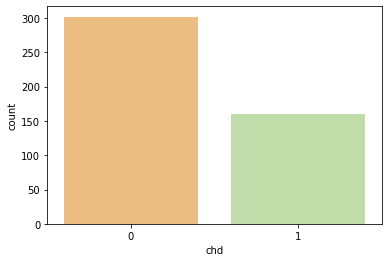

In [11]:
sns.countplot(x=df.chd,palette='Spectral')
plt.show()

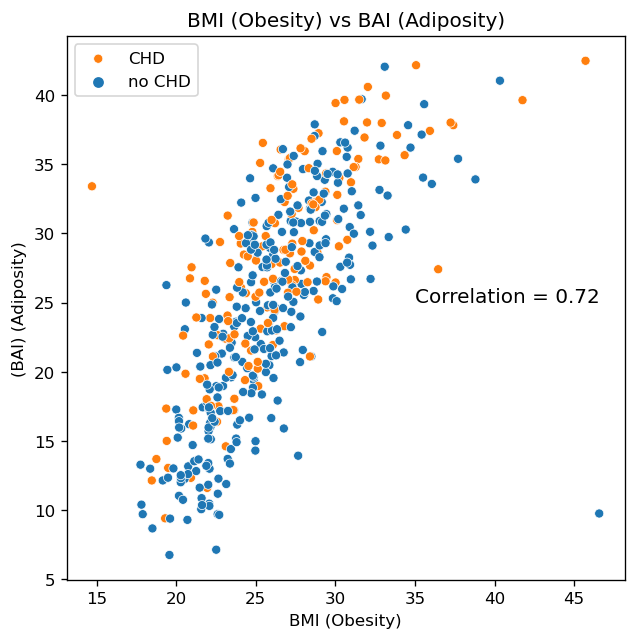

In [12]:
# plot obesity vs adiposity with chd as the hue
# increase dpi to make the image clearer
plt.figure(dpi=120, figsize=(6, 6))
sns.scatterplot(x=df.obesity, y=df.adiposity, hue=df.chd, size=df.chd, sizes=(30, 30))
plt.xlabel('BMI (Obesity)')
plt.ylabel('(BAI) (Adiposity)')
# make 1 be "CHD" and 0 be "No CHD"
plt.legend(loc='upper left', labels=['CHD', 'no CHD'])
# title
plt.title('BMI (Obesity) vs BAI (Adiposity)')
# find the correlation between obesity and adiposity
corr = df.obesity.corr(df.adiposity)
# add correlation in the plot
plt.text(35, 25, f'Correlation = {corr:.2f}', size=12)
plt.show()

In [13]:
def plot_boxplots(dataframe):
    num_columns = dataframe.select_dtypes(include=['number']).columns 
    num_plots = len(num_columns)
    rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(20, 20))  

    for i, column in enumerate(num_columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        sns.boxplot(x=dataframe[column], ax=ax)
        ax.set_title(f"Boxplot of {column}")
        ax.set_xlabel(column)

    plt.tight_layout()
    plt.show()

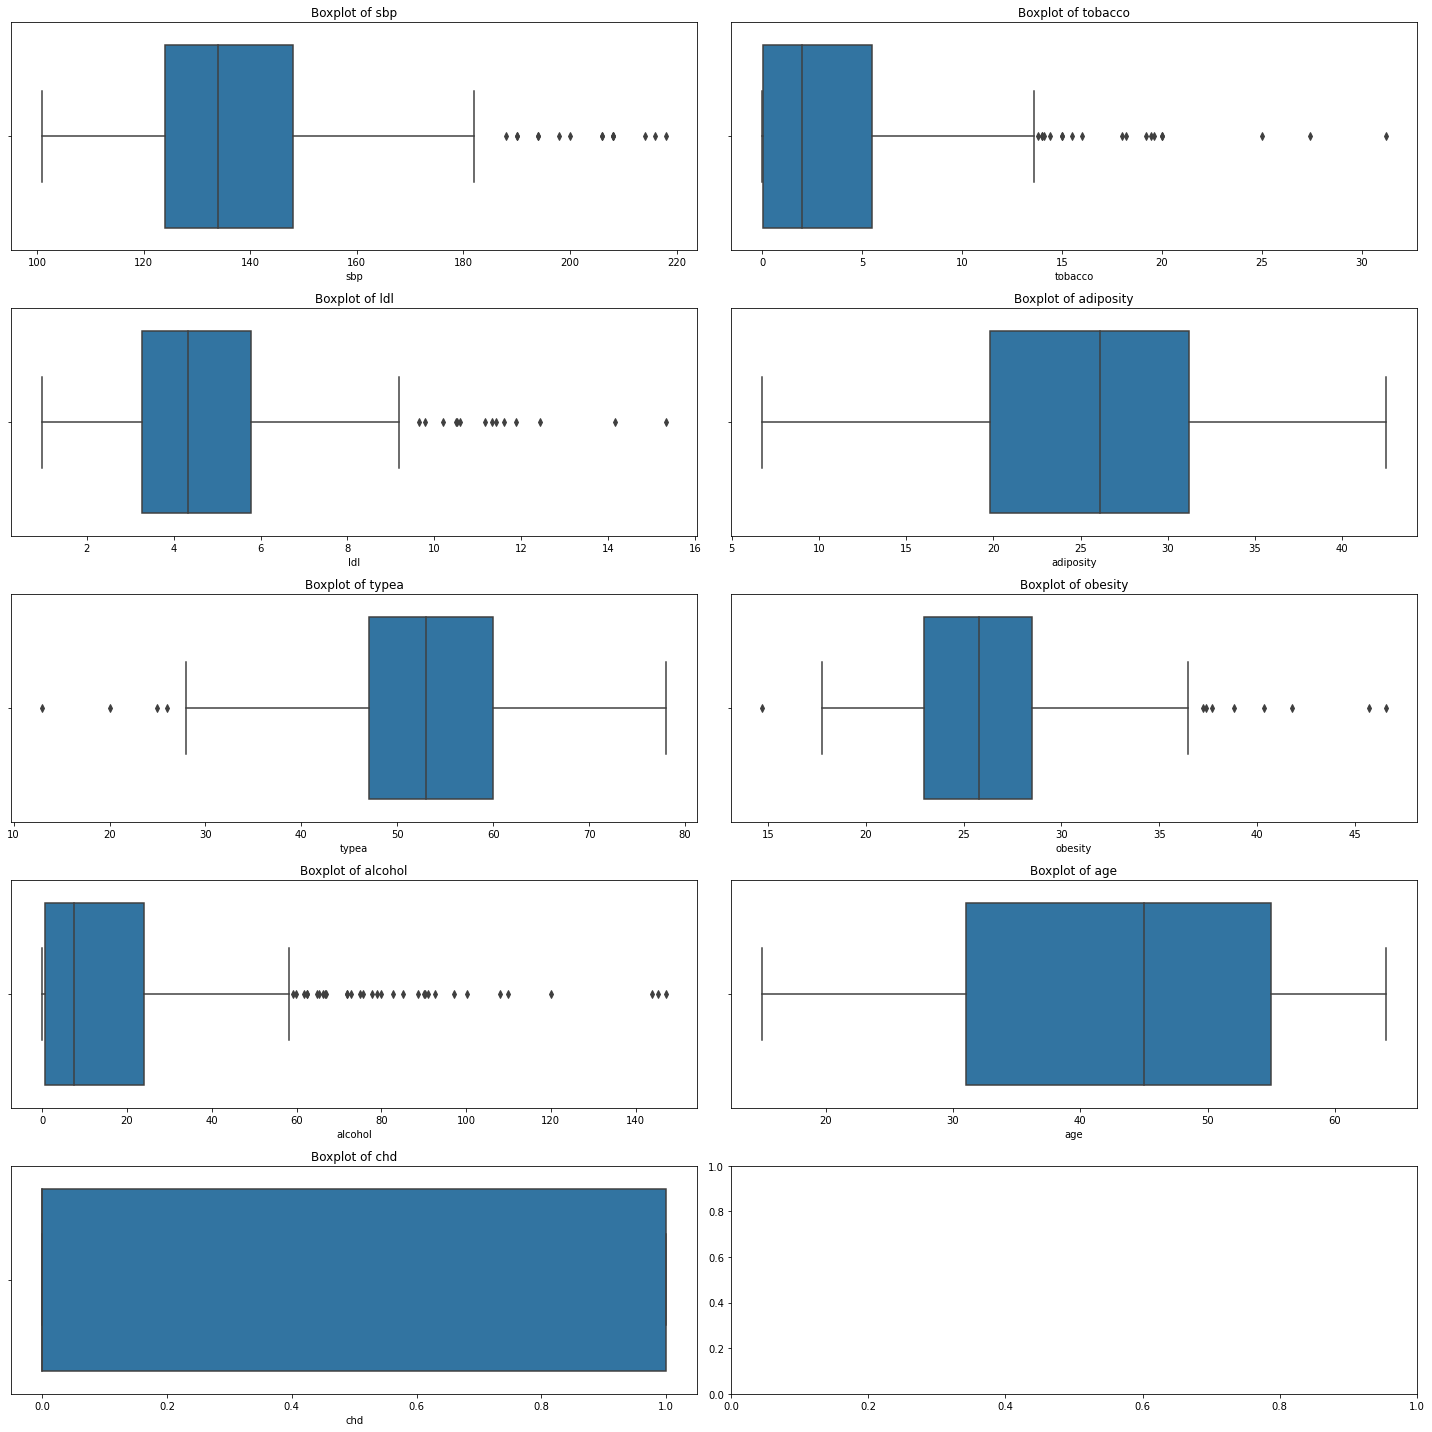

In [14]:
plot_boxplots(df)

# Cleaning the data

In [15]:
df1 = df.copy()
df1

sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age  \
0    160    12.00   5.73      23.11  Present     49    25.30    97.20   52   
1    144     0.01   4.41      28.61   Absent     55    28.87     2.06   63   
2    118     0.08   3.48      32.28  Present     52    29.14     3.81   46   
3    170     7.50   6.41      38.03  Present     51    31.99    24.26   58   
4    134    13.60   3.50      27.78  Present     60    25.99    57.34   49   
..   ...      ...    ...        ...      ...    ...      ...      ...  ...   
457  214     0.40   5.98      31.72   Absent     64    28.45     0.00   58   
458  182     4.20   4.41      32.10   Absent     52    28.61    18.72   52   
459  108     3.00   1.59      15.23   Absent     40    20.09    26.64   55   
460  118     5.40  11.61      30.79   Absent     64    27.35    23.97   40   
461  132     0.00   4.82      33.41  Present     62    14.70     0.00   46   

     chd  
0      1  
1      1  
2      0  
3      1  
4      1  
..   ...  
457    0  
458    1  
459    0  
460    0  
461    1  

[462 rows x 10 columns]

In [16]:
df1.max()

sbp              218
tobacco         31.2
ldl            15.33
adiposity      42.49
famhist      Present
typea             78
obesity        46.58
alcohol       147.19
age               64
chd                1
dtype: object

In [17]:
# check for missing values
df1.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

replace norminal data with binary data

In [18]:
# replace norminal values with binary values
df1['famhist'] = df1['famhist'].replace({'Present': 1, 'Absent': 0})
df1

sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age  \
0    160    12.00   5.73      23.11        1     49    25.30    97.20   52   
1    144     0.01   4.41      28.61        0     55    28.87     2.06   63   
2    118     0.08   3.48      32.28        1     52    29.14     3.81   46   
3    170     7.50   6.41      38.03        1     51    31.99    24.26   58   
4    134    13.60   3.50      27.78        1     60    25.99    57.34   49   
..   ...      ...    ...        ...      ...    ...      ...      ...  ...   
457  214     0.40   5.98      31.72        0     64    28.45     0.00   58   
458  182     4.20   4.41      32.10        0     52    28.61    18.72   52   
459  108     3.00   1.59      15.23        0     40    20.09    26.64   55   
460  118     5.40  11.61      30.79        0     64    27.35    23.97   40   
461  132     0.00   4.82      33.41        1     62    14.70     0.00   46   

     chd  
0      1  
1      1  
2      0  
3      1  
4      1  
..   ...  
457    0  
458    1  
459    0  
460    0  
461    1  

[462 rows x 10 columns]

In [19]:
df1.max()

sbp          218.00
tobacco       31.20
ldl           15.33
adiposity     42.49
famhist        1.00
typea         78.00
obesity       46.58
alcohol      147.19
age           64.00
chd            1.00
dtype: float64

# Visualizing the data

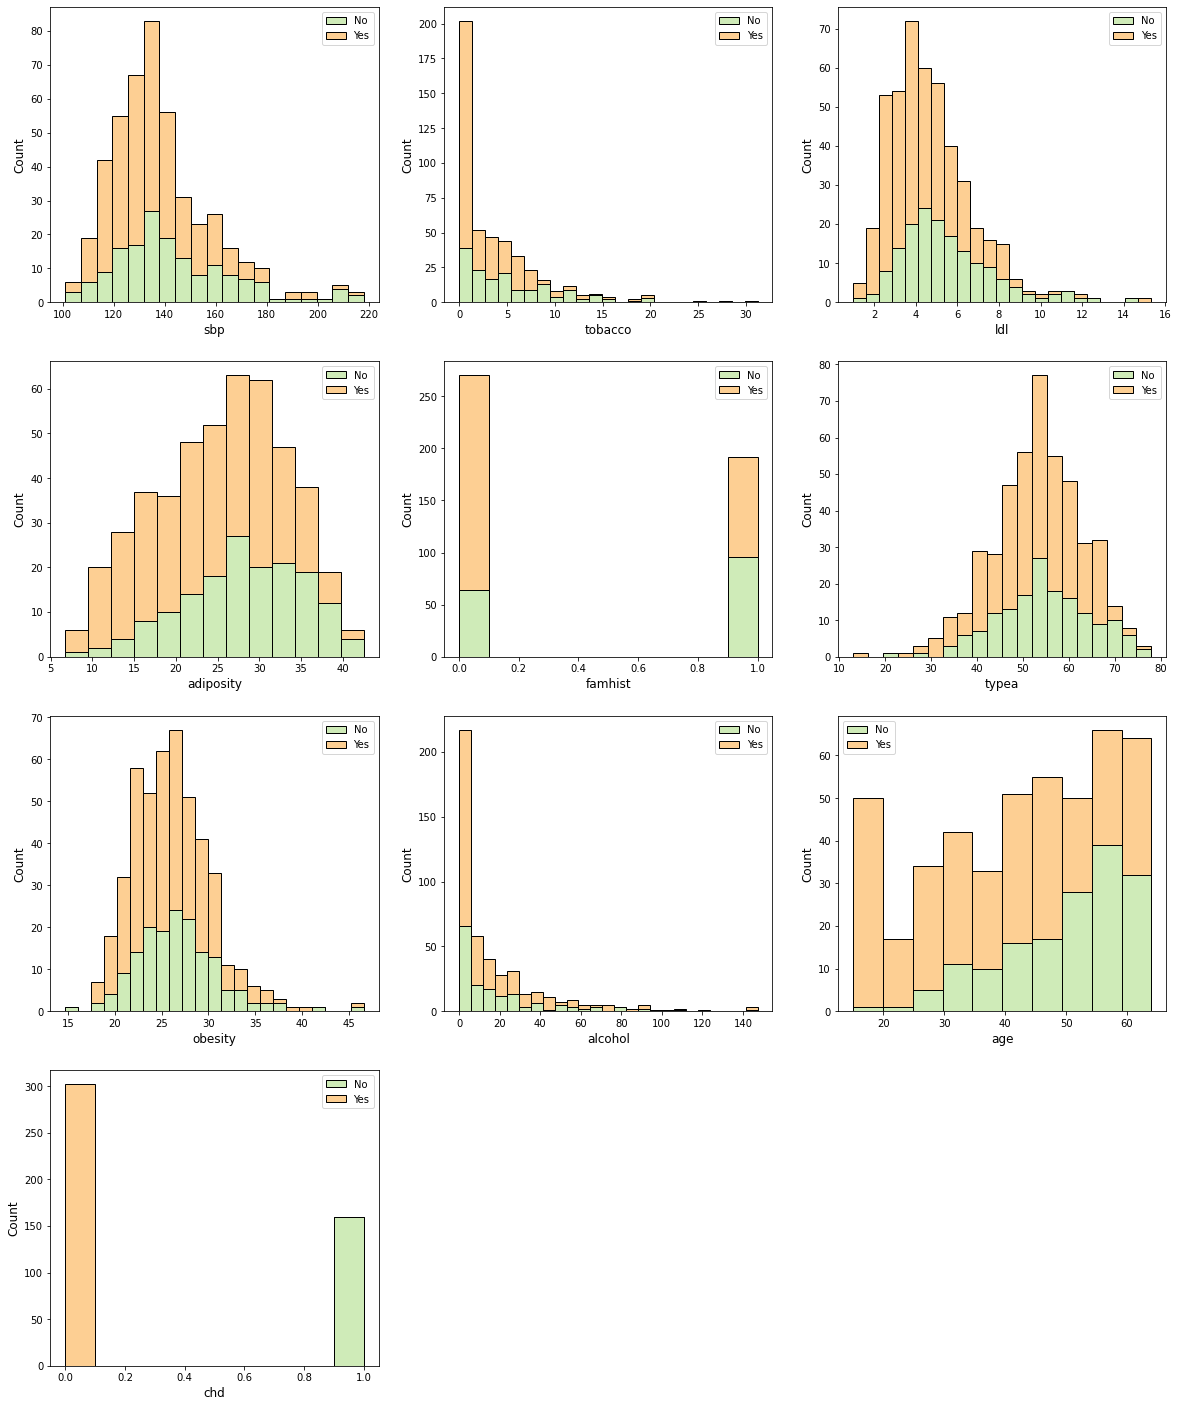

In [20]:
# plot histogram of all the features and hue = chd
plt.figure(figsize=(20,25), facecolor='white')

for i, column in enumerate(df1.columns, 1):
    ax = plt.subplot(4, 3, i)
    sns.histplot(data=df1, x=column, hue='chd', ax=ax, palette='Spectral', multiple='stack')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(['No', 'Yes'])
    
plt.show()



In [21]:
df2 = df1.drop(['chd', 'famhist'], axis=1)
df2

sbp  tobacco    ldl  adiposity  typea  obesity  alcohol  age
0    160    12.00   5.73      23.11     49    25.30    97.20   52
1    144     0.01   4.41      28.61     55    28.87     2.06   63
2    118     0.08   3.48      32.28     52    29.14     3.81   46
3    170     7.50   6.41      38.03     51    31.99    24.26   58
4    134    13.60   3.50      27.78     60    25.99    57.34   49
..   ...      ...    ...        ...    ...      ...      ...  ...
457  214     0.40   5.98      31.72     64    28.45     0.00   58
458  182     4.20   4.41      32.10     52    28.61    18.72   52
459  108     3.00   1.59      15.23     40    20.09    26.64   55
460  118     5.40  11.61      30.79     64    27.35    23.97   40
461  132     0.00   4.82      33.41     62    14.70     0.00   46

[462 rows x 8 columns]

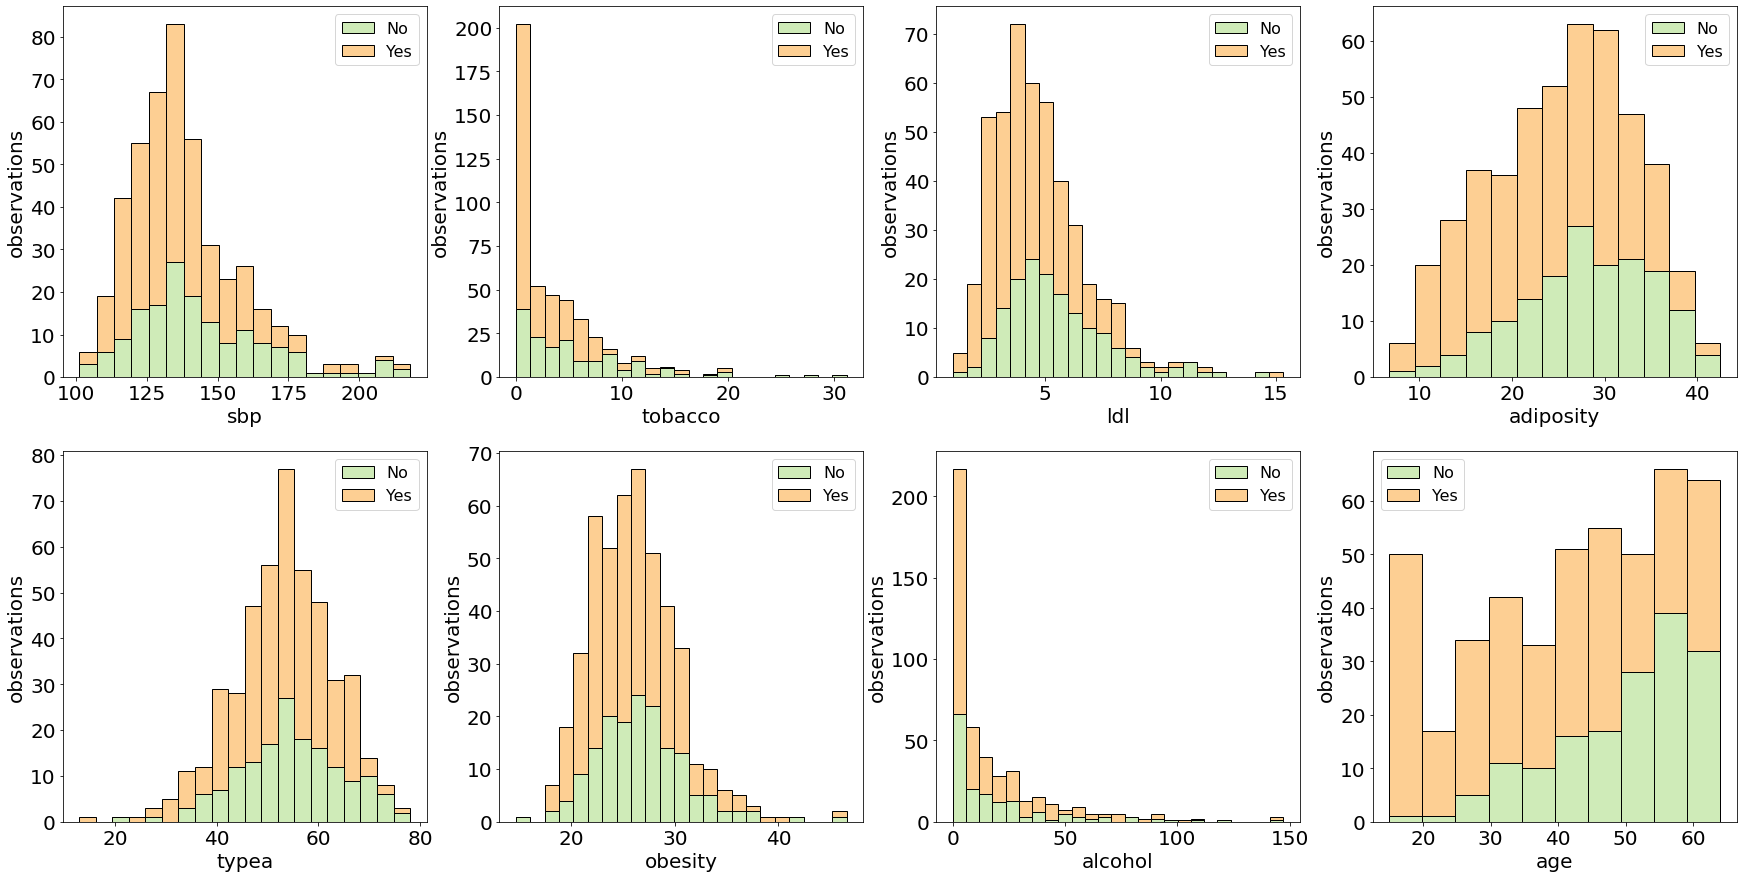

In [40]:
# Histogrammer
columns_to_plot = [col for col in df1.columns if col not in ['chd', 'famhist']]

plt.figure(figsize=(30,15), facecolor='white')

for i, column in enumerate(columns_to_plot, 1):
    ax = plt.subplot(2, 4, i)
    sns.histplot(data=df1, x=column, hue='chd', ax=ax, palette='Spectral', multiple='stack')
    
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    
    plt.xlabel(column, fontsize=20)
    plt.ylabel('observations', fontsize=20)
    plt.legend(['No', 'Yes'], fontsize=16)

    
plt.show()

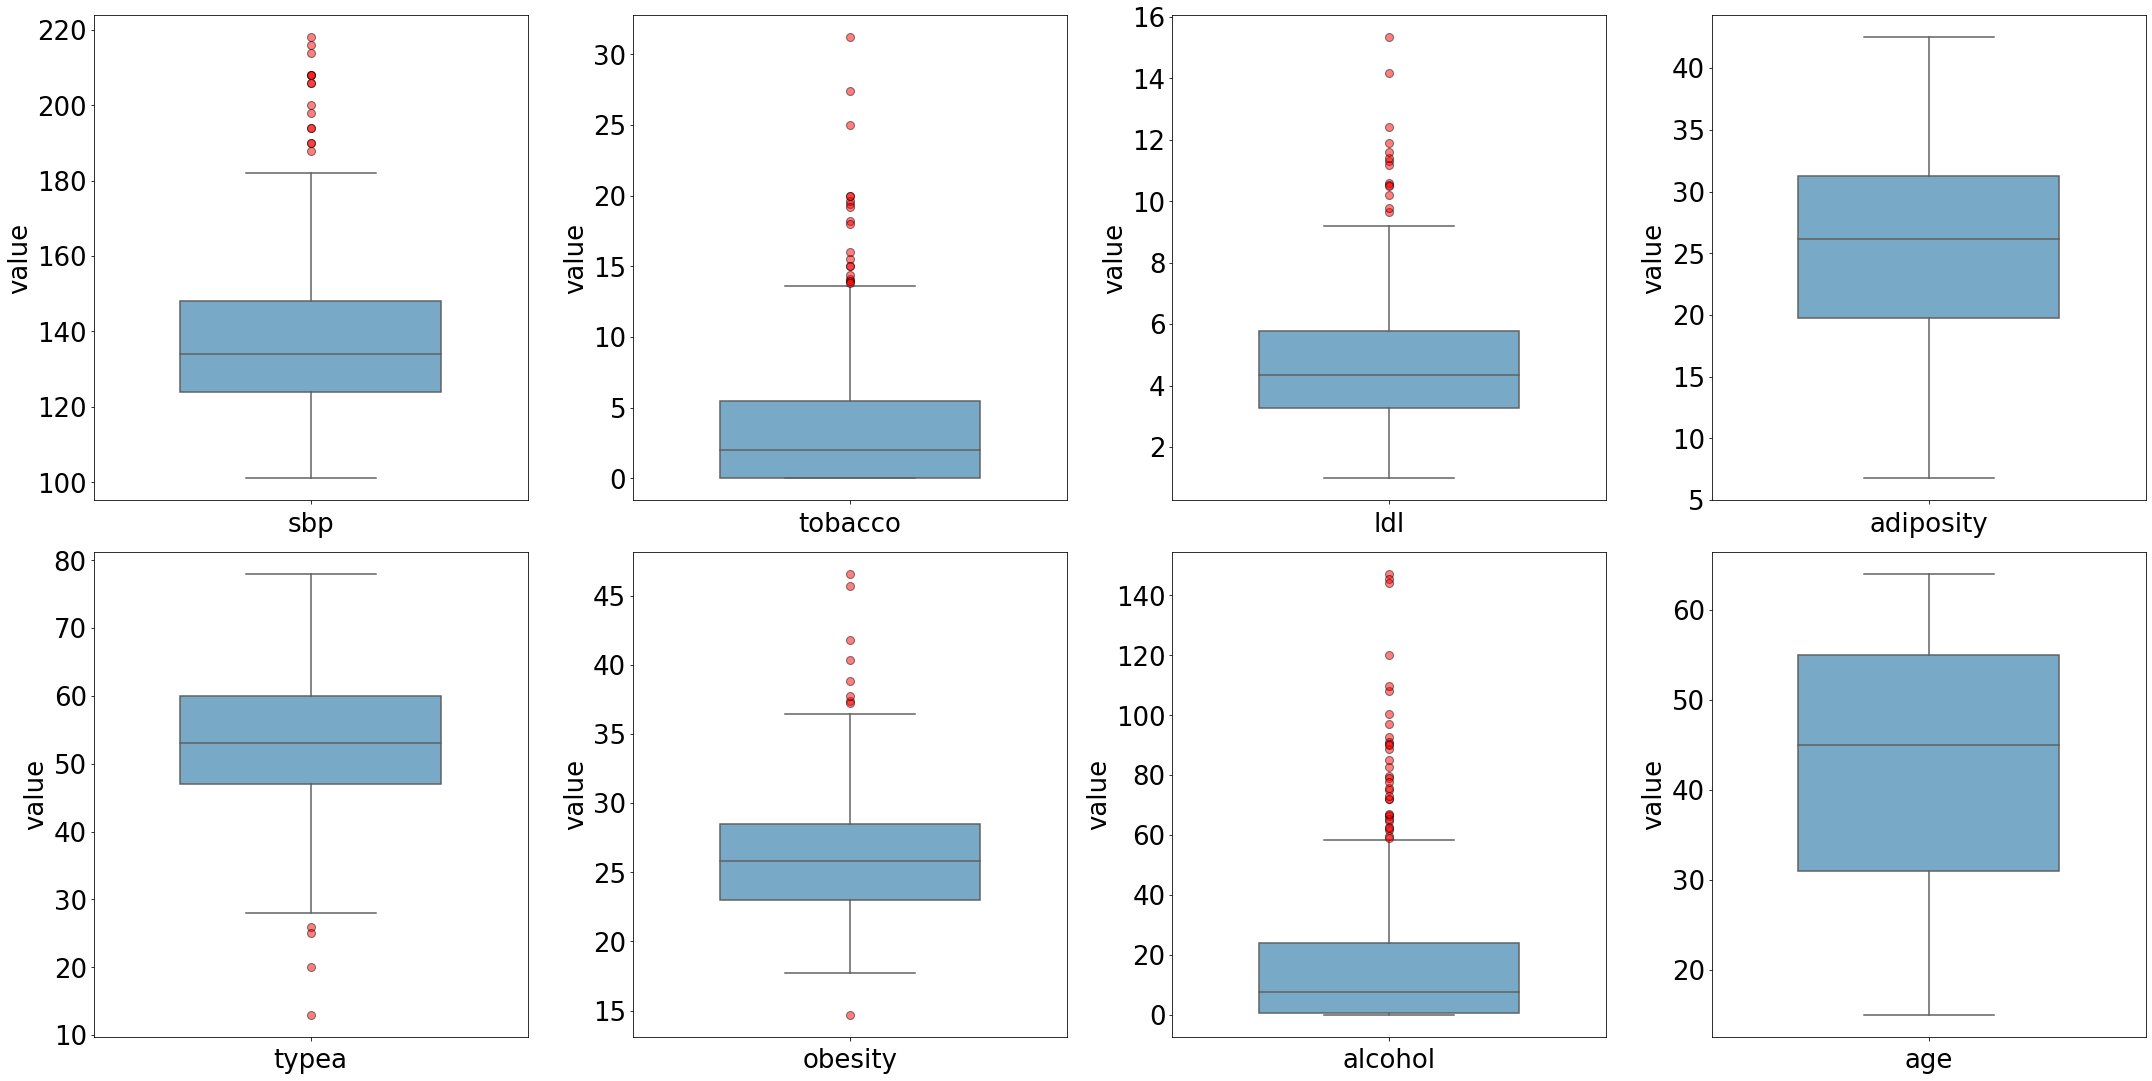

In [41]:
# Boxplots
columns_to_plot = [col for col in df1.columns if col not in ['chd', 'famhist']]

plt.figure(figsize=(30,15), facecolor='white')

flierprops = dict(marker='o', markerfacecolor='red', markersize=8,
                  linestyle='none', markeredgecolor='black', alpha=0.5)

for i, column in enumerate(columns_to_plot, 1):
    ax = plt.subplot(2, 4, i)
    
    sns.boxplot(data=df1, y=column, ax=ax, palette='Blues', 
                flierprops=flierprops, width=0.6)
    
    ax.tick_params(axis='x', labelsize=26)
    ax.tick_params(axis='y', labelsize=26)
    
    plt.xlabel(column, fontsize=26)
    plt.ylabel('value', fontsize=26)

plt.tight_layout()
plt.show()

In [23]:
# normalize data
df2_normalized = (df2 - df2.mean()) / df2.std()
df2_normalized

sbp   tobacco       ldl  adiposity     typea   obesity   alcohol  \
0    1.057417  1.821099  0.477894  -0.295183 -0.418017 -0.176594  3.274189   
1    0.276789 -0.789382 -0.159507   0.411694  0.193134  0.670646 -0.612081   
2   -0.991731 -0.774141 -0.608585   0.883374 -0.112441  0.734723 -0.540597   
3    1.545310  0.841352  0.806252   1.622382 -0.214300  1.411091  0.294742   
4   -0.211103  2.169453 -0.598928   0.305020  0.702427 -0.012842  1.645991   
..        ...       ...       ...        ...       ...       ...       ...   
457  3.692037 -0.704470  0.598614   0.811401  1.109862  0.570971 -0.696228   
458  2.130781  0.122871 -0.159507   0.860240 -0.112441  0.608942  0.068445   
459 -1.479624 -0.138395 -1.521228  -1.307946 -1.334744 -1.413043  0.391960   
460 -0.991731  0.384137  3.317227   0.691875  1.109862  0.309916  0.282897   
461 -0.308682 -0.791559  0.038474   1.028605  0.906144 -2.692210 -0.696228   

          age  
0    0.628654  
1    1.381617  
2    0.217947  
3    1.039361  
4    0.423301  
..        ...  
457  1.039361  
458  0.628654  
459  0.834008  
460 -0.192760  
461  0.217947  

[462 rows x 8 columns]

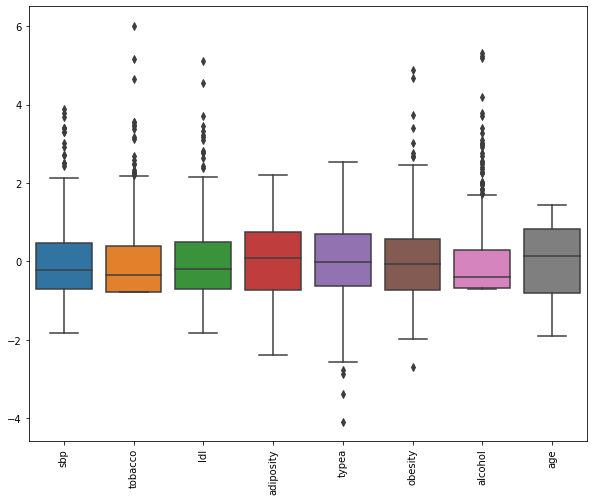

In [24]:
# boxplot of normalized data
plt.figure(figsize=(10,8), facecolor='white')
sns.boxplot(data=df2_normalized)
plt.xticks(rotation=90)
plt.show()

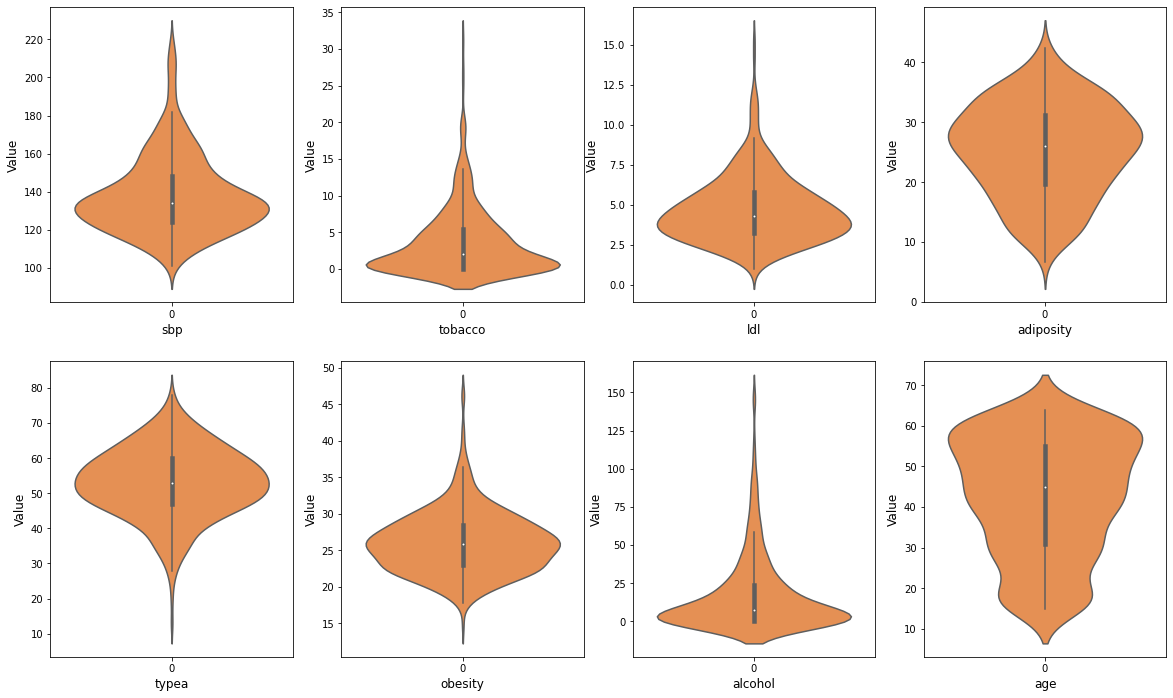

In [25]:
# one violin plot for each feature
plt.figure(figsize=(20,25), facecolor='white')
for i, column in enumerate(df2.columns, 1):
    ax = plt.subplot(4, 4, i)
    sns.violinplot(data=df2[column], ax=ax, palette='Oranges')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Value', fontsize=12)


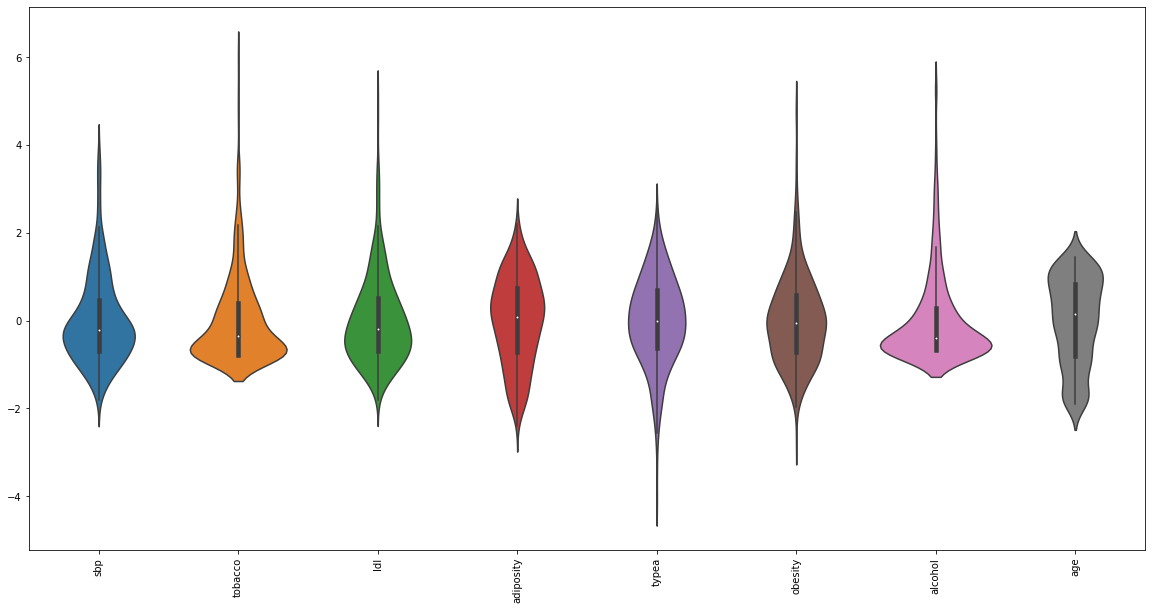

In [26]:
# violin plot of normalized data
fig, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(data=df2_normalized)
plt.xticks(rotation=90)
plt.show()

In [27]:
def plotCorrelationMatrix(df, graphWidth):
    plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
    df = df.select_dtypes(include=[np.number])
    df = df.dropna(axis='columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1, cmap = 'coolwarm')
    # show values in each cell    
    for (i, j), z in np.ndenumerate(corr):
        plt.text(i, j, '{:0.2f}'.format(z), ha='center', va='center', color='black', fontsize=12)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for', fontsize=15)
    plt.show()

<Figure size 640x640 with 0 Axes>

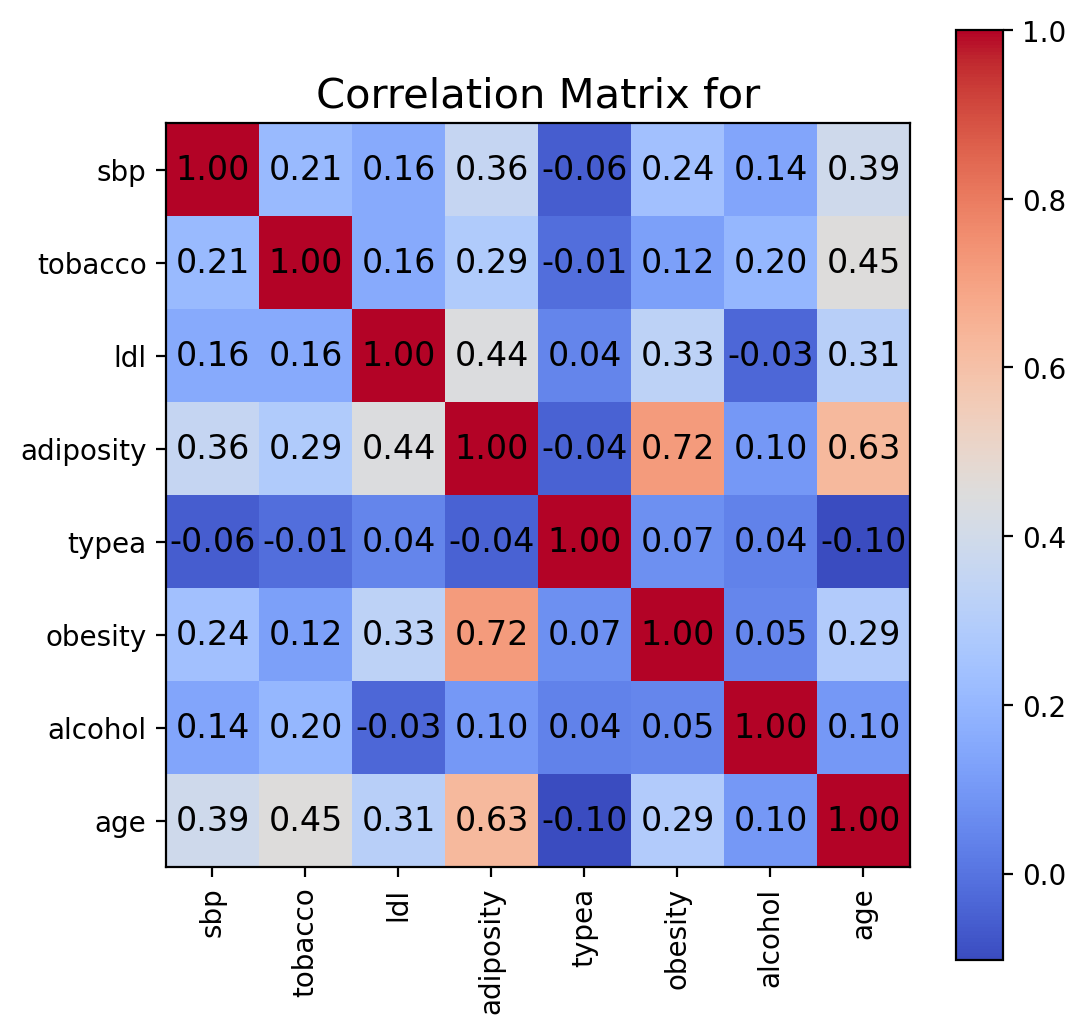

In [28]:
plotCorrelationMatrix(df2_normalized, 8)

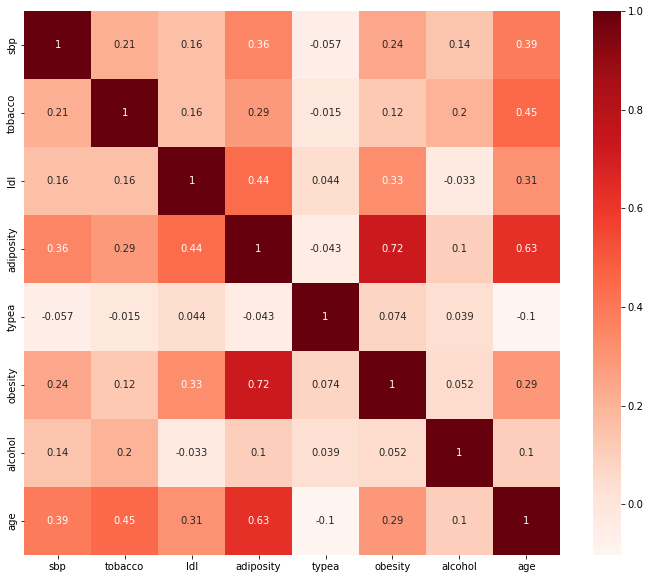

In [29]:
# plot heatmap of correlation matrix
plt.figure(figsize=(12,10))
cor = df2_normalized.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [30]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns')
    df = df[[col for col in df if df[col].nunique() > 1]]  # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10:  # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.1, 0.2), xycoords='axes fraction', ha='left', va='center', size=textSize, color='red')
    plt.suptitle('Scatter and Density Plot')
    plt.show()

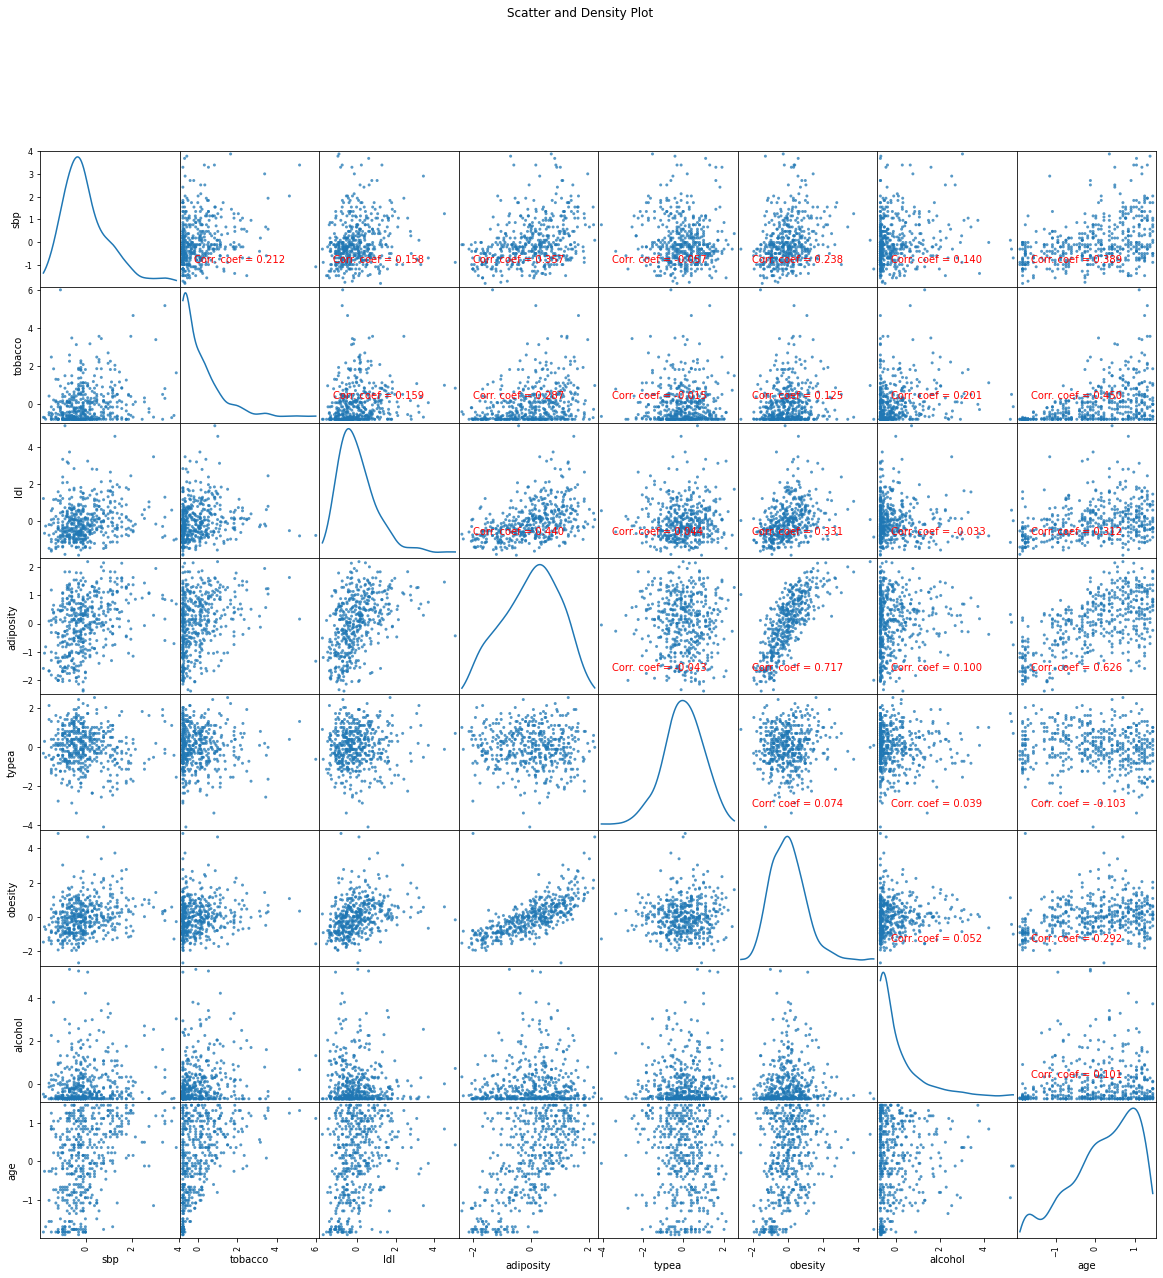

In [31]:
plotScatterMatrix(df2_normalized, 20, 10)

In [32]:
# remove rownames and famhist
df1_2 = df1.drop(['famhist'], axis=1)

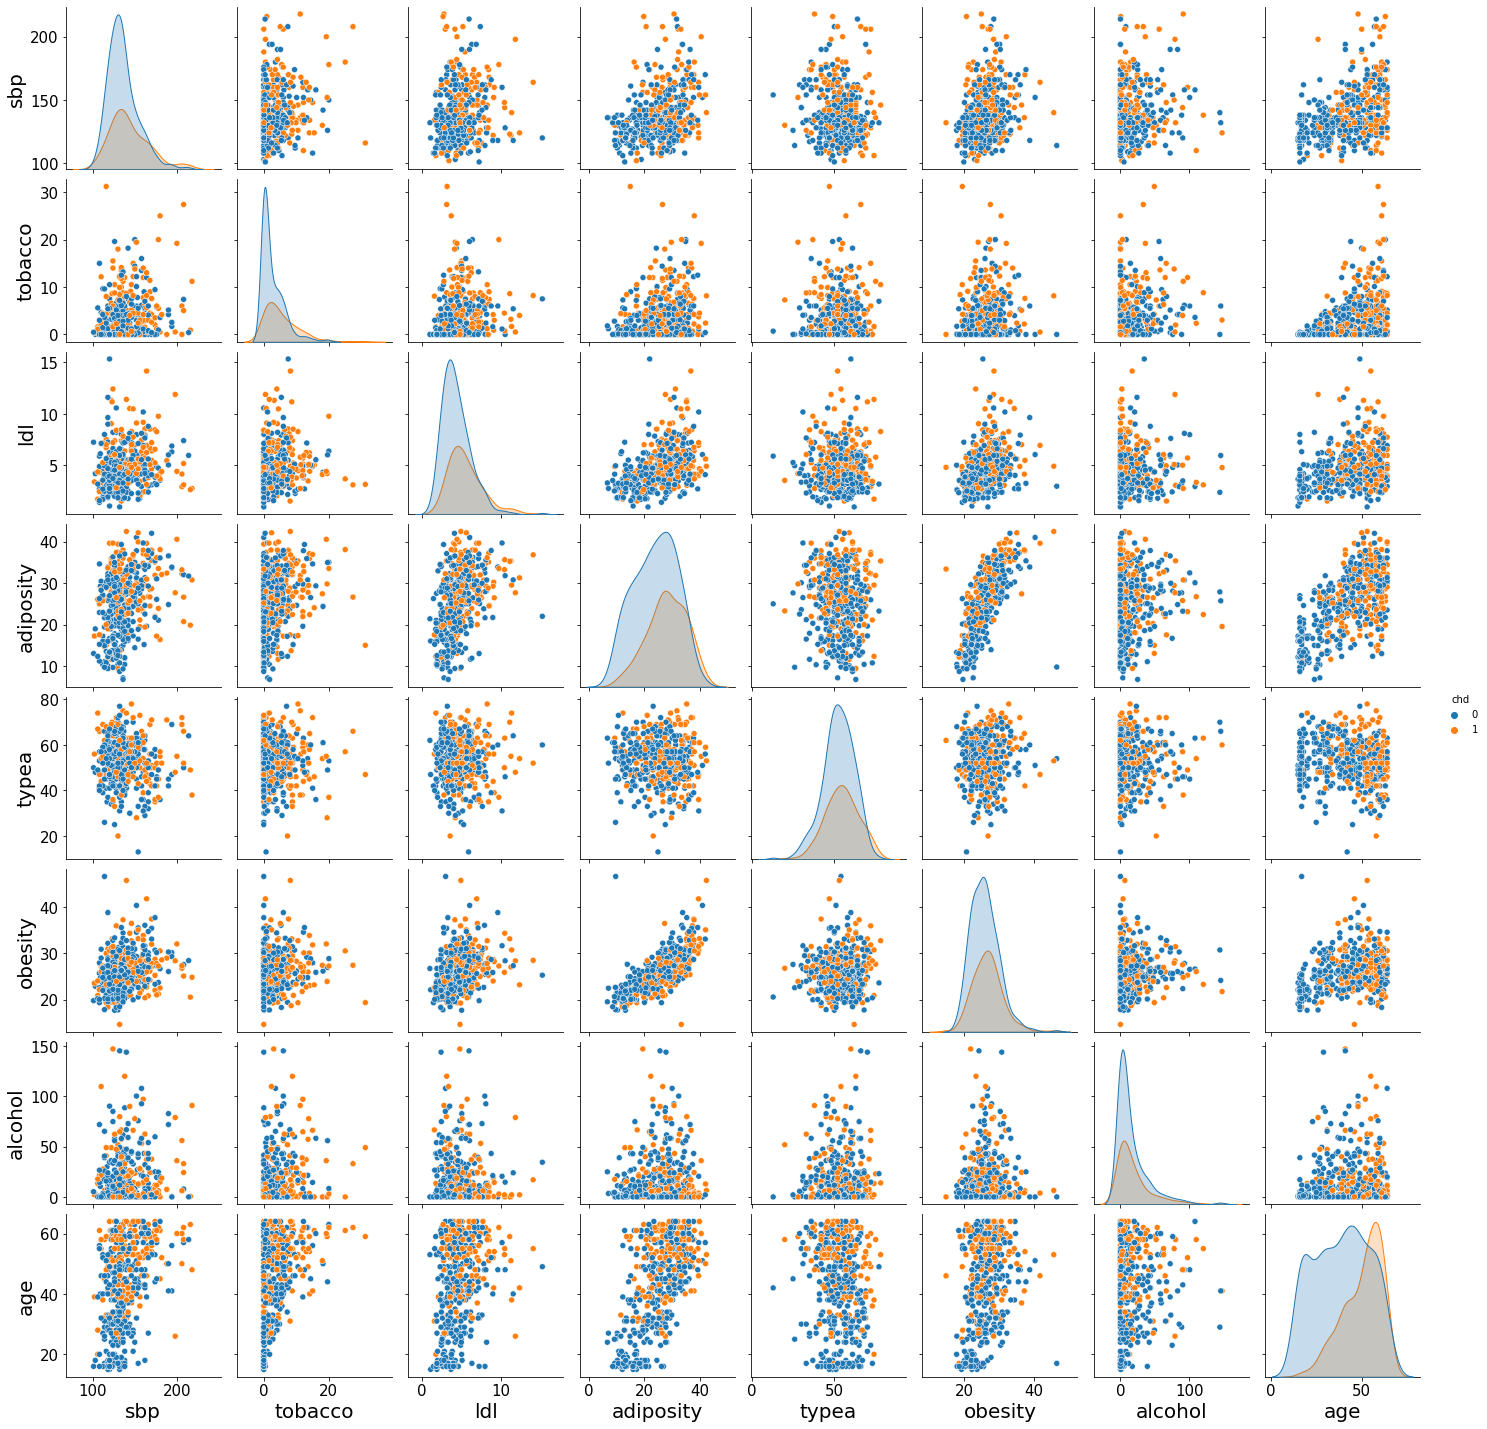

In [33]:
pair_plot = sns.pairplot(df1_2, hue='chd', height=2.5)

# Set the fontsize for each axes
for ax in pair_plot.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)
    ax.tick_params(axis='x', labelsize=15) 
    ax.tick_params(axis='y', labelsize=15) 

# Show the plot
plt.show()

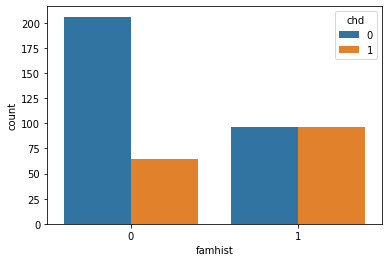

In [34]:
sns.countplot(data = df1, x='famhist', hue='chd')
plt.show()

In [35]:
# do svd
from scipy.linalg import svd
U, S, Vh = svd(df2_normalized, full_matrices=False)

# transpose Vh
V = Vh.T

Z = df2_normalized.dot(V)
Z.head()

0         1         2         3         4         5         6  \
0 -1.544790  3.054753  1.286366  0.358591  0.837071  1.194768  0.500384   
1 -0.850807 -0.697797 -0.393544  0.261739 -0.616337 -0.515443 -1.125434   
2 -0.032492 -1.043021 -0.338041  0.499025  0.575225 -1.154151 -0.679842   
3 -3.009410  0.025515 -0.119683  0.440916 -0.391353 -0.022599  0.392199   
4 -0.932303  1.887045  1.566794 -0.688881  0.684666 -0.773190  0.350877   

          7  
0  0.437870  
1  0.564725  
2 -0.219956  
3 -0.094099  
4 -0.188814

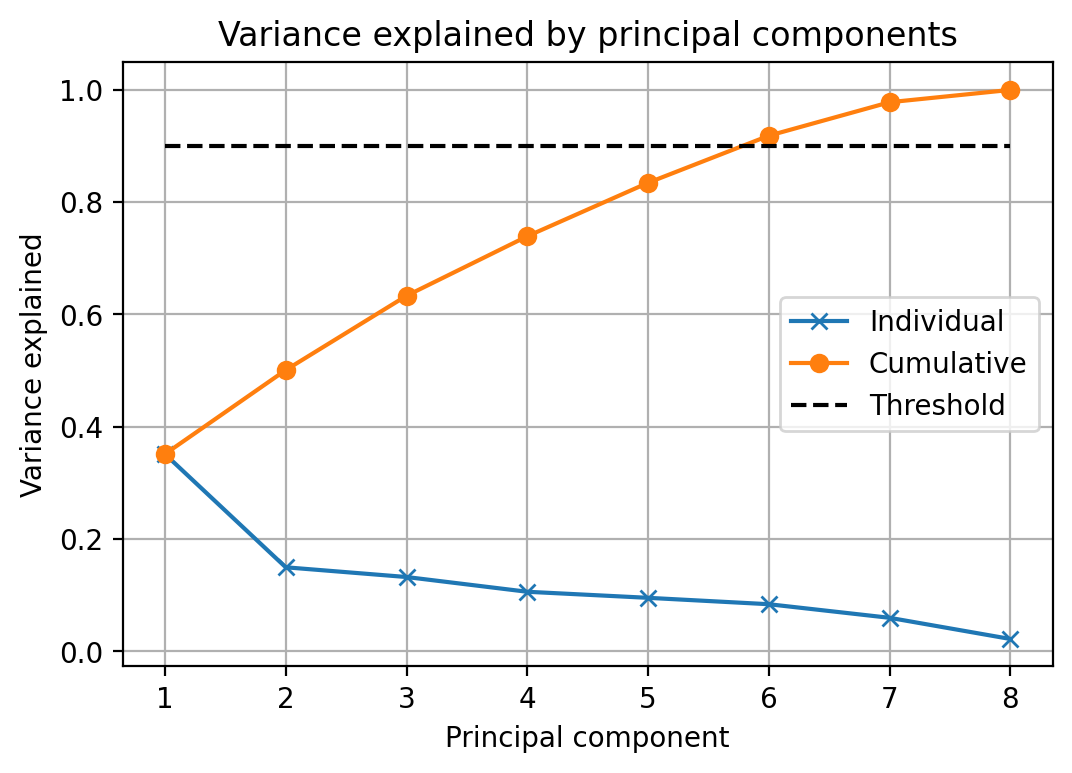

In [36]:
rho = (S*S) / (S*S).sum() 

threshold = 0.90

# Plot variance explained
plt.figure(figsize=(6,4), facecolor='white', dpi=200)
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

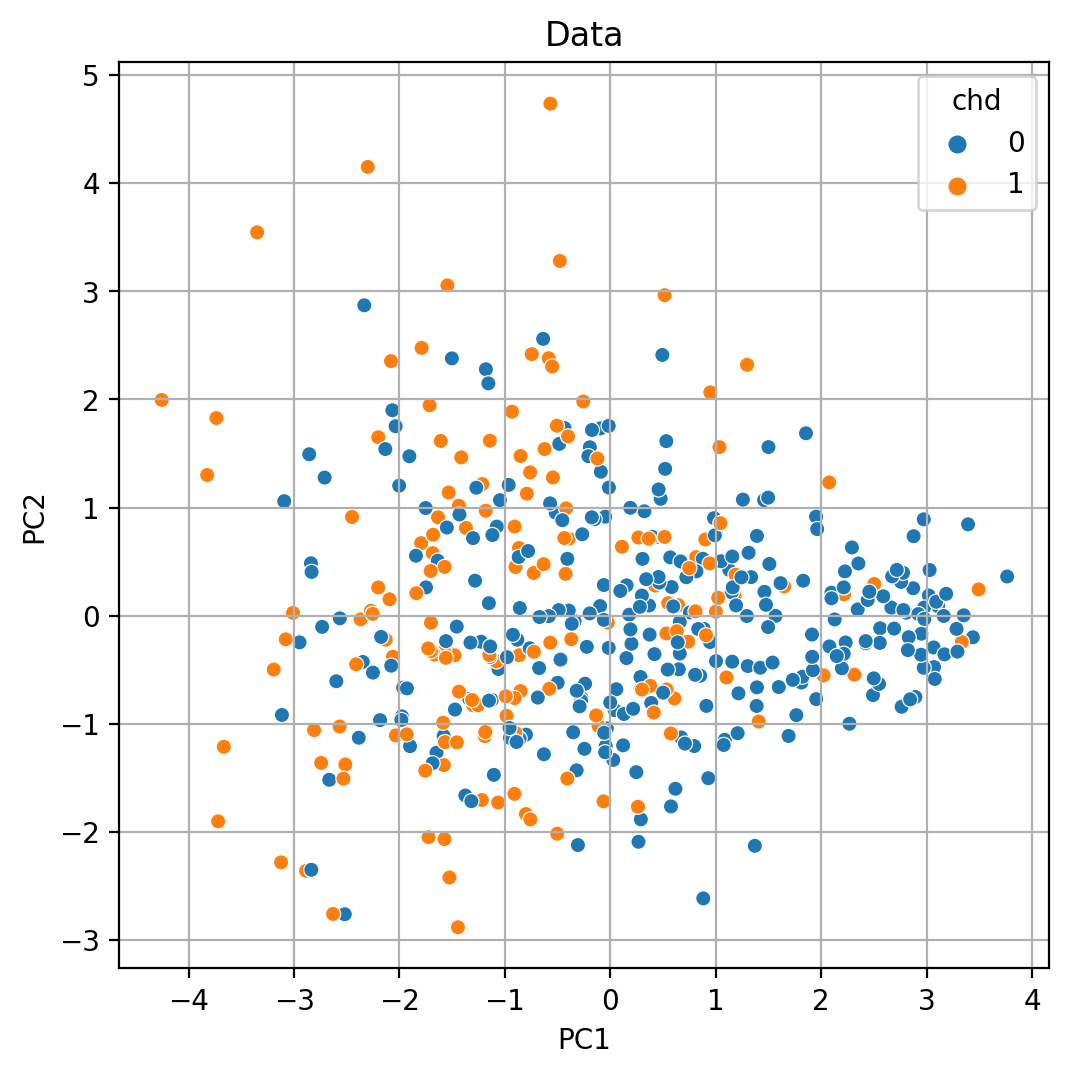

In [37]:
# Plot PCA of the data with DNK_YN
# make plot bigger
plt.figure(figsize=(6,6), facecolor='white', dpi=200)
sns.scatterplot(x=Z.iloc[:,0], y=Z.iloc[:,1], hue=df1.chd, size=df1.chd, sizes=(30, 30))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data')
plt.grid()
plt.show()

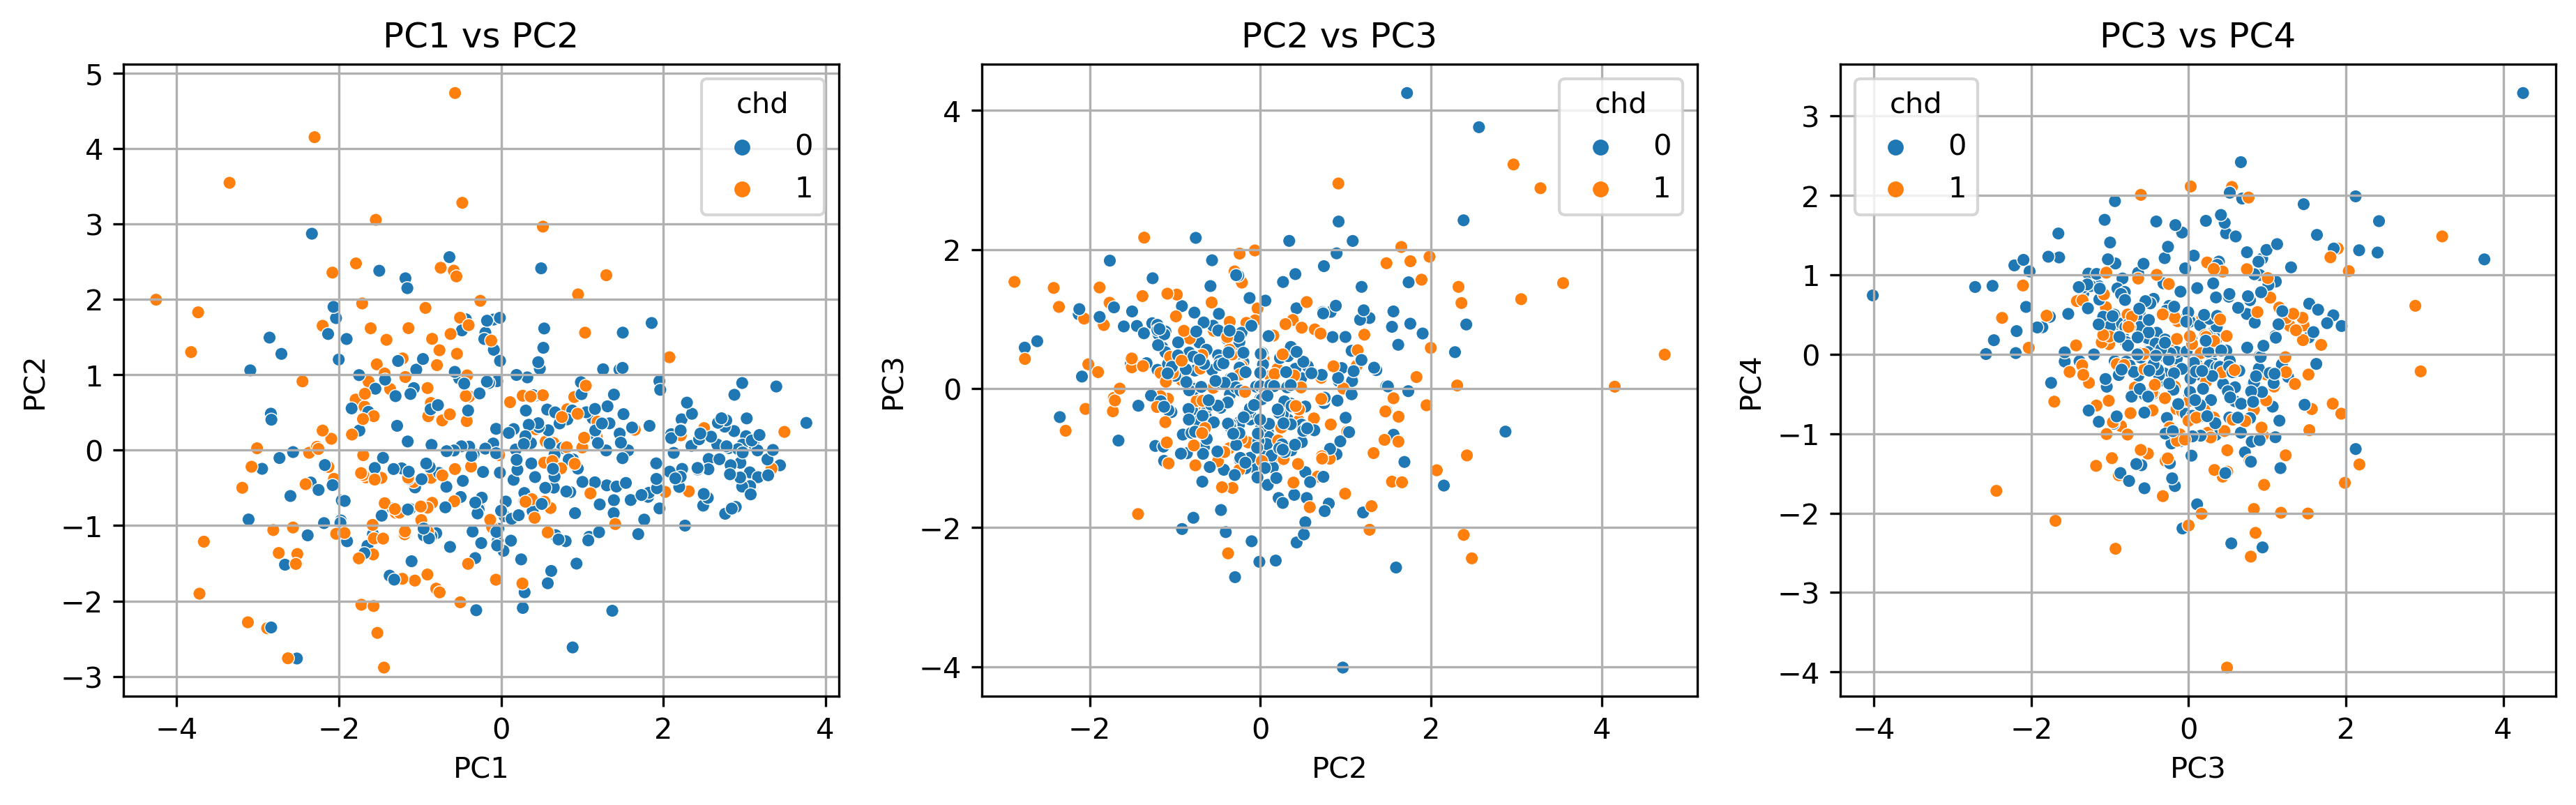

In [38]:
# plot pc1 vs pc2 with chd as the hue in first subplot, 2 subplots with pc2 vs pc3, 3 subplots with pc3 vs pc4

fig, axes = plt.subplots(1, 3, figsize=(15, 4), dpi=300, facecolor='white')
sns.scatterplot(x=Z.iloc[:,0], y=Z.iloc[:,1], hue=df1.chd, size=df1.chd, sizes=(20, 20), ax=axes[0])
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('PC1 vs PC2')
axes[0].grid()

sns.scatterplot(x=Z.iloc[:,1], y=Z.iloc[:,2], hue=df1.chd, size=df1.chd, sizes=(20, 20), ax=axes[1])
axes[1].set_xlabel('PC2')
axes[1].set_ylabel('PC3')
axes[1].set_title('PC2 vs PC3')
axes[1].grid()

sns.scatterplot(x=Z.iloc[:,2], y=Z.iloc[:,3], hue=df1.chd, size=df1.chd, sizes=(20, 20), ax=axes[2])
axes[2].set_xlabel('PC3')
axes[2].set_ylabel('PC4')
axes[2].set_title('PC3 vs PC4')
axes[2].grid()

plt.show()

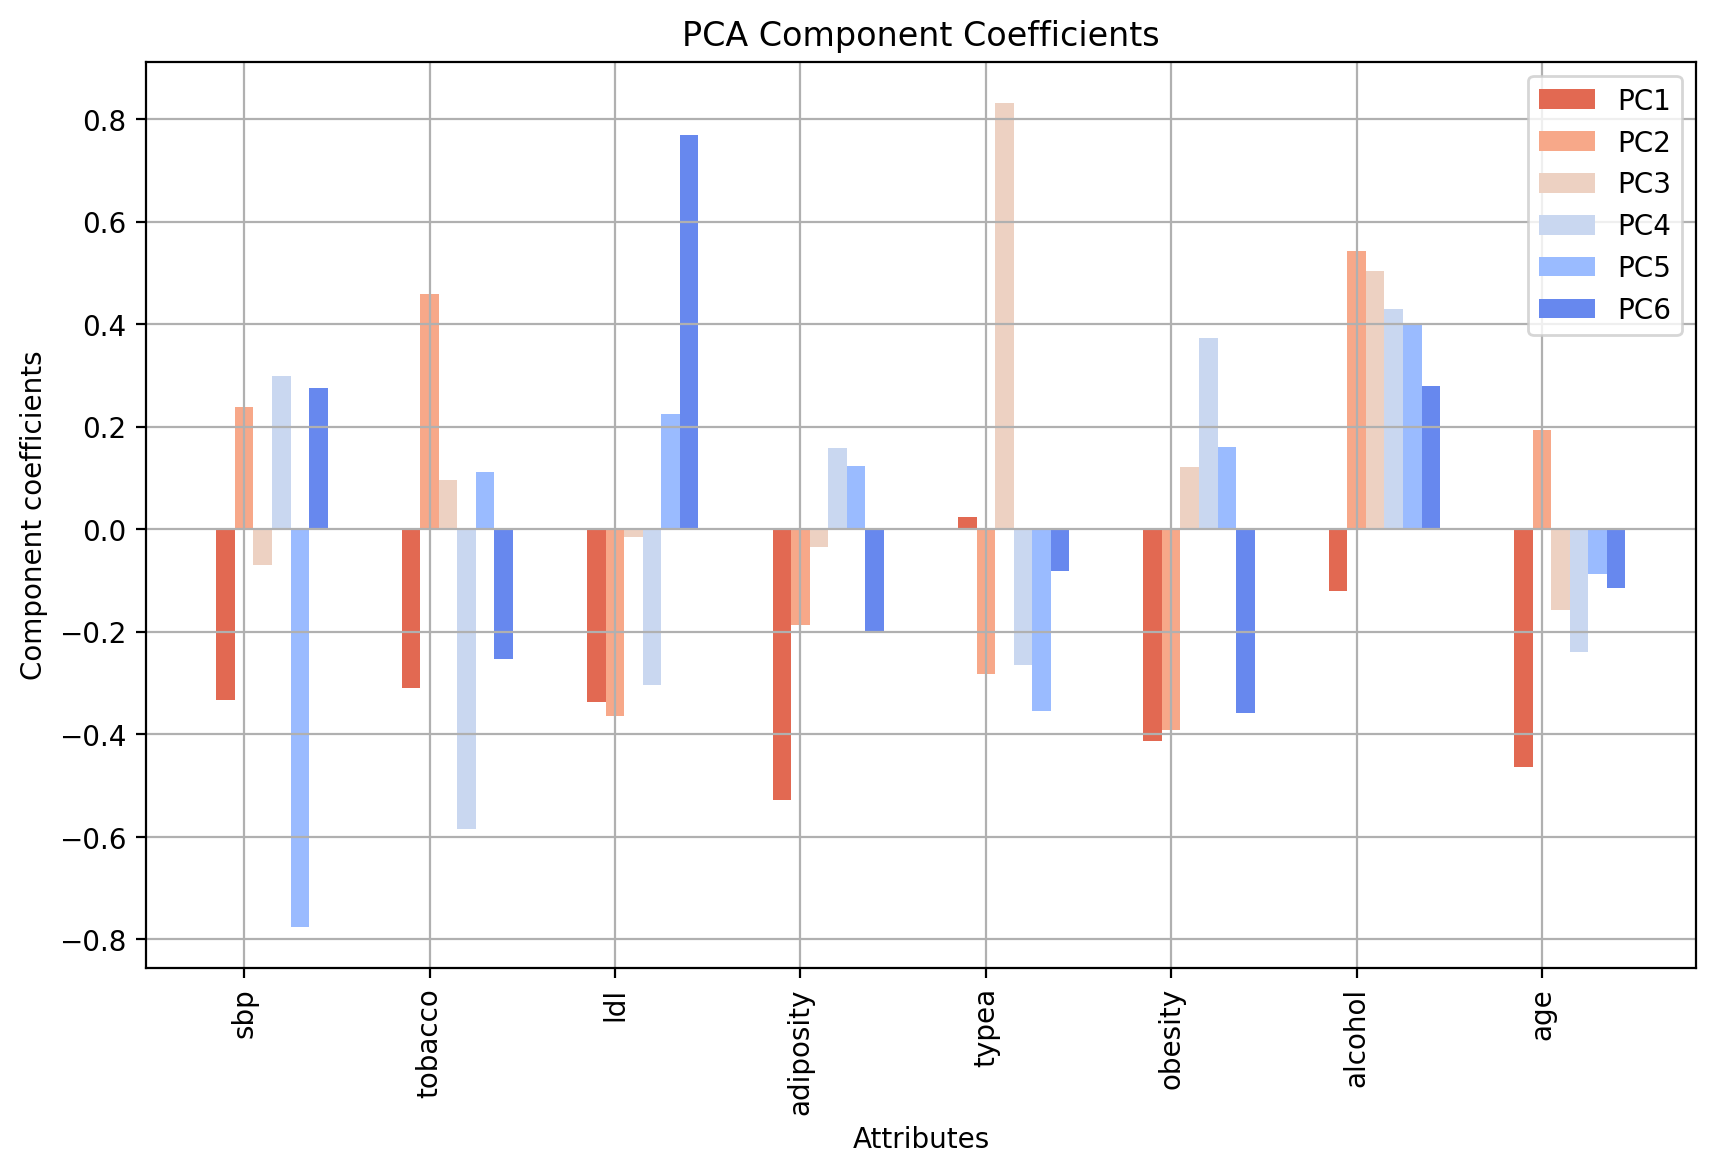

In [39]:
columns = df2_normalized.columns
pcs = [0,1,2,3,4,5]
legendStrs = ['PC'+str(e+1) for e in pcs]
bw = .1
r = np.arange(1,df2_normalized.shape[1]+1)
plt.figure(figsize=(10,6), facecolor='white', dpi=200)
# choose color palette with seaborn with increasing luminance coolwarm
colors = sns.color_palette('coolwarm', n_colors=len(pcs))

for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw, color=colors[5-i])
plt.xticks(r+bw, columns, rotation=90)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('PCA Component Coefficients')
plt.show()